In [16]:
import pandas as pd

In [17]:
ds = pd.read_csv('../../datasets/built_dataset.csv')
ds.head()

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,green hot peppers,capsicum,2021-01-01,09:14:26.212,102900005116226,1.132,25.8,sale,No
1,green hot peppers,capsicum,2021-01-01,09:14:26.324,102900005116226,0.593,25.8,sale,No
2,yunnan lettuces,flower,2021-01-01,09:16:20.074,102900005115984,0.468,6.0,sale,No
3,xixia mushroom,mushroom,2021-01-01,09:18:49.451,102900005116530,0.389,18.0,sale,No
4,paopaojiao,capsicum,2021-01-01,09:19:14.842,102900005117056,0.606,18.0,sale,No


In [37]:
# Remove the unnecessary columns 
df = ds.drop(columns=['Unit Selling Price (RMB/kg)','Discount (Yes/No)'])
df.head(10)


,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Sale or Return
0,green hot peppers,capsicum,2021-01-01,09:14,102900005116226,1.132,sale
1,green hot peppers,capsicum,2021-01-01,09:14,102900005116226,0.593,sale
2,yunnan lettuces,flower,2021-01-01,09:16,102900005115984,0.468,sale
3,xixia mushroom,mushroom,2021-01-01,09:18,102900005116530,0.389,sale
4,paopaojiao,capsicum,2021-01-01,09:19,102900005117056,0.606,sale
5,red hang pepper,capsicum,2021-01-01,09:30,102900005116943,0.171,sale
6,xixia mushroom,mushroom,2021-01-01,09:32,102900005116530,0.161,sale
7,paopaojiao,capsicum,2021-01-01,09:32,102900005117056,0.350,sale
8,paopaojiao,capsicum,2021-01-01,09:33,102900005117056,0.300,sale
9,luosi pepper,capsicum,2021-01-01,09:33,102900011000328,0.411,sale


In [38]:
#Checking the sum of missing value for each column
df.isnull().sum()

Item Name               0
Category Name           0
Date                    0
Time                    0
Item Code               0
Quantity Sold (kilo)    0
Sale or Return          0
dtype: int64

In [39]:
# Check the duplicate data 
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
475423    False
475424    False
475425    False
475426    False
475427    False
Length: 475428, dtype: bool

In [52]:
# Remove the minutes,seconds and milliseconds in time 
df['Time'] = df['Time'].apply(lambda x: x.split(':')[0])
df.head(100)

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Sale or Return
0,green hot peppers,capsicum,2021-01-01,09,102900005116226,1.132,sale
1,green hot peppers,capsicum,2021-01-01,09,102900005116226,0.593,sale
2,yunnan lettuces,flower,2021-01-01,09,102900005115984,0.468,sale
3,xixia mushroom,mushroom,2021-01-01,09,102900005116530,0.389,sale
4,paopaojiao,capsicum,2021-01-01,09,102900005117056,0.606,sale
...,...,...,...,...,...,...,...
95,niushou youcai,flower,2021-01-01,10,102900005115861,0.388,sale
96,xixia mushroom,mushroom,2021-01-01,10,102900005116530,0.223,sale
97,zhijiang red bolt,flower,2021-01-01,10,102900005122654,0.473,sale
98,paopaojiao,capsicum,2021-01-01,10,102900005117056,0.389,sale


In [41]:
# Check the values of each category name
df['Category Name'].value_counts()

Category Name
flower      203383
capsicum    131143
mushroom     60398
aquatic      37928
solanum      26788
cabbage      15788
Name: count, dtype: int64

In [45]:
# Check the year range 
df['Date'].min(),df['Date'].max()

(Timestamp('2021-01-01 00:00:00'), Timestamp('2022-12-31 00:00:00'))

In [60]:
# Remove all the return values 
df = df[df['Sale or Return'] != 'return']
df

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Sale or Return
0,green hot peppers,capsicum,2021-01-01,09,102900005116226,1.132,sale
1,green hot peppers,capsicum,2021-01-01,09,102900005116226,0.593,sale
2,yunnan lettuces,flower,2021-01-01,09,102900005115984,0.468,sale
3,xixia mushroom,mushroom,2021-01-01,09,102900005116530,0.389,sale
4,paopaojiao,capsicum,2021-01-01,09,102900005117056,0.606,sale
...,...,...,...,...,...,...,...
475423,luosi pepper,capsicum,2022-12-31,21,102900011032251,1.000,sale
475424,wawacai,flower,2022-12-31,21,102900005118831,1.000,sale
475425,yunnan lettuce,flower,2022-12-31,21,102900011030059,1.000,sale
475426,wawacai,flower,2022-12-31,21,102900005118831,1.000,sale


In [63]:
# prove that there is no return values
return_rows = df[df['Sale or Return'] == 'Return']
return_rows

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Sale or Return


In [71]:
# Rename sale or return column name to Sales
df.rename(columns={'Sale or Return': 'Sales'}, inplace=True)
df.head(10)

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Sales
0,green hot peppers,capsicum,2021-01-01,09,102900005116226,1.132,sale
1,green hot peppers,capsicum,2021-01-01,09,102900005116226,0.593,sale
2,yunnan lettuces,flower,2021-01-01,09,102900005115984,0.468,sale
3,xixia mushroom,mushroom,2021-01-01,09,102900005116530,0.389,sale
4,paopaojiao,capsicum,2021-01-01,09,102900005117056,0.606,sale
5,red hang pepper,capsicum,2021-01-01,09,102900005116943,0.171,sale
6,xixia mushroom,mushroom,2021-01-01,09,102900005116530,0.161,sale
7,paopaojiao,capsicum,2021-01-01,09,102900005117056,0.350,sale
8,paopaojiao,capsicum,2021-01-01,09,102900005117056,0.300,sale
9,luosi pepper,capsicum,2021-01-01,09,102900011000328,0.411,sale


In [65]:
# 2021 sales
df['Date'] = pd.to_datetime(df['Date'])
df_2021 = df[df['Date'].dt.year == 2021]
df_2021

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Sales
0,green hot peppers,capsicum,2021-01-01,09,102900005116226,1.132,sale
1,green hot peppers,capsicum,2021-01-01,09,102900005116226,0.593,sale
2,yunnan lettuces,flower,2021-01-01,09,102900005115984,0.468,sale
3,xixia mushroom,mushroom,2021-01-01,09,102900005116530,0.389,sale
4,paopaojiao,capsicum,2021-01-01,09,102900005117056,0.606,sale
...,...,...,...,...,...,...,...
262579,luosi pepper,capsicum,2021-12-31,21,102900011000328,0.192,sale
262580,xixia mushroom,mushroom,2021-12-31,21,102900005116530,0.244,sale
262581,millet pepper,capsicum,2021-12-31,21,102900011031100,1.000,sale
262582,millet pepper,capsicum,2021-12-31,21,102900011031100,1.000,sale


In [66]:
# 2022 sales
df['Date'] = pd.to_datetime(df['Date'])
df_2022 = df[df['Date'].dt.year == 2022]
df_2022

,Item Name,Category Name,Date,Time,Item Code,Quantity Sold (kilo),Sales
262584,net lotus root,aquatic,2022-01-01,09,102900005116899,0.470,sale
262585,wuhu green pepper,capsicum,2022-01-01,09,102900011016701,0.206,sale
262586,caixin,flower,2022-01-01,09,102900005115908,0.302,sale
262587,xixia mushroom,mushroom,2022-01-01,09,102900005116530,0.401,sale
262588,shanghaiqing,flower,2022-01-01,09,102900005115823,0.484,sale
...,...,...,...,...,...,...,...
475423,luosi pepper,capsicum,2022-12-31,21,102900011032251,1.000,sale
475424,wawacai,flower,2022-12-31,21,102900005118831,1.000,sale
475425,yunnan lettuce,flower,2022-12-31,21,102900011030059,1.000,sale
475426,wawacai,flower,2022-12-31,21,102900005118831,1.000,sale


In [67]:
# Monthly sales Quantity Sold (kilo) in 2021
sales_data_2021 = df_2021.groupby(df_2021['Date'].dt.month)['Quantity Sold (kilo)'].sum().reset_index().rename(columns = {"Date" : "Month"}).round(0).astype('int')
sales_data_2021

,Month,Quantity Sold (kilo)
0,1,10226
1,2,13239
2,3,9746
3,4,8466
4,5,9174
5,6,8434
6,7,9439
7,8,11933
8,9,8901
9,10,8151


In [68]:
# Monthly sales Quantity Sold (kilo) in 2022
sales_data_2022 = df_2022.groupby(df_2022['Date'].dt.month)['Quantity Sold (kilo)'].sum().reset_index().rename(columns = {"Date" : "Month"}).round(0).astype('int')
sales_data_2022

,Month,Quantity Sold (kilo)
0,1,10478
1,2,7477
2,3,7210
3,4,6767
4,5,6350
5,6,6881
6,7,10580
7,8,18228
8,9,13234
9,10,16128


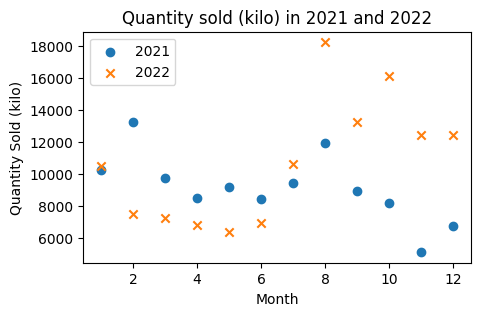

In [69]:
import matplotlib.pyplot as plt
# Plotting the scatter plot for 2021 and 2022 on the same plot
plt.figure(figsize=(5, 3))
plt.scatter(sales_data_2021['Month'], sales_data_2021['Quantity Sold (kilo)'], label='2021', marker='o')
plt.scatter(sales_data_2022['Month'], sales_data_2022['Quantity Sold (kilo)'], label='2022', marker='x')

plt.title('Quantity sold (kilo) in 2021 and 2022')
plt.xlabel('Month')
plt.ylabel('Quantity Sold (kilo)')
plt.legend()
plt.show()